# Multivariate Regression With Regularization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Parse data, define m and n values

points = np.genfromtxt('ex1data2.txt', delimiter = ',')
m, n = points.shape

x = np.array(points[:, :-1])
y = np.array(points[:, -1:])

<IPython.core.display.Javascript object>


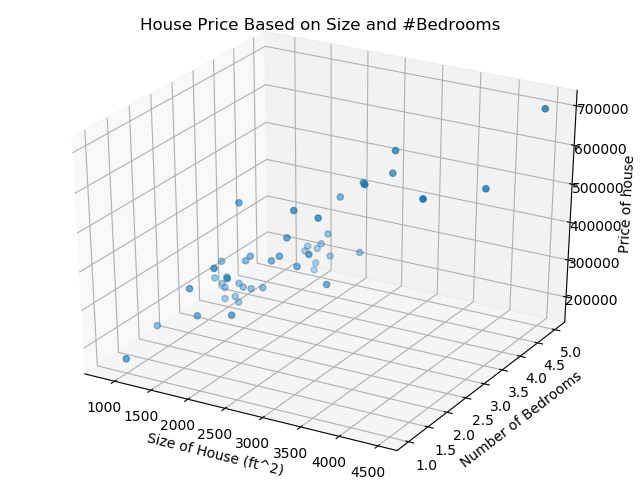

In [13]:
# Plot the data
%matplotlib notebook

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x[:,0], x[:,1], y)
ax.set(title='House Price Based on Size and #Bedrooms', xlabel='Size of House (ft^2)', ylabel='Number of Bedrooms', zlabel='Price of house')
plt.show()

In [4]:
def feature_normalize(x):
    X_norm = x[:]
    mu = np.mean(X_norm)
    sigma = np.std(X_norm)
    X_norm = np.divide(X_norm - mu, sigma) 
    return X_norm 

x_norm = feature_normalize(x)

<IPython.core.display.Javascript object>


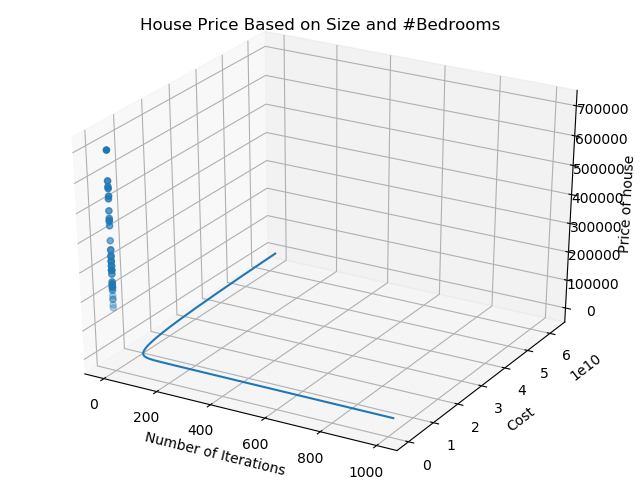

In [14]:
# Plot the data
%matplotlib notebook

fig2 = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_norm[:,0], x_norm[:,1], y)
ax.set(title='House Price Based on Size and #Bedrooms', xlabel='Size of House (ft^2)', ylabel='Number of Bedrooms', zlabel='Price of house')
plt.show()

In [6]:
# Add a column of ones to x, we will call this X
ones = np.ones((m,1))
X = np.hstack((ones, x_norm))

In [7]:
#Hyperparameters
iterations = 1000
alpha = 0.01

theta = np.zeros((n, 1))

In [8]:
def cost(x, y, theta):
    #Number of training samples
    m = y.shape[0]
    cost = np.square(np.dot(x, theta) - y)
    J = cost.sum()/(2 * m)
    return J

cost(X,y,theta)

65591548106.45744

In [9]:
def gradient_descent(x, y, theta, alpha, iterations):
    m = y.shape[0]
    
    theta_new = np.copy(theta)
    theta_history = []
    
    for i in range(iterations):
        theta_new = theta_new - alpha * np.dot(x.T, (np.dot(x, theta_new) - y)) / m
        theta_history.append(theta_new)
        
    return theta_new, theta_history 

theta, theta_hist = gradient_descent(X,y,theta,alpha,iterations)
theta

array([[ 117312.58404498],
       [ 153003.61412252],
       [-102505.55800857]])

In [10]:
# # If you use normal equation, then feature scaling is not necessary
# def normal_equation(x, y, theta):
#     theta_new = np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), y)                  
#     return theta_new

# theta = normal_equation(X, y, theta)

In [11]:
cost(X,y,theta)

2058000677.1044824

<IPython.core.display.Javascript object>


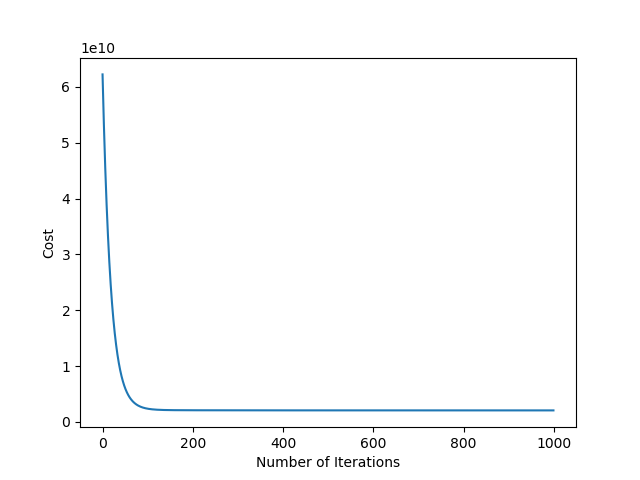

In [17]:
# Plotting Cost over the Number of Iterations
cost_x = np.arange(iterations)
cost_y = np.zeros((iterations))

for i in range(iterations):
    # We need to reshape theta_hist[i] because we want to feed in a [2x1] matrix
    cost_y[i] = cost(X,y,theta_hist[i])

fig3 = plt.figure()

#Plot both the data points as well as the line of best fit
plt.plot(cost_x, cost_y)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show() 